# Predicting heart disease using machine learning
This notebook looks into using many Python-based and data science libraries in an attempt to build a machine learning model to predict heart disease. In order to run successfully the program, the following command needs to be run for having the proper env: `conda env create --prefix ./env -f environment.yml`
The following approach will be taken:
1. Problem definition
2. Data
3. Evaluaiton
4. Features
5. Modelling
6. Experimentaiton

## 1. Problem Definition
Given a clinical dataset, can we predict if someone has heart disease?


## 2. Data
* Column Descriptions:
* Id (Unique id for each patient)
* Age (Age of the patient in years)
* Origin (place of study)
* Sex (Male/Female)
* Cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* Trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* Chol (serum cholesterol in mg/dl)
* Fbs (if fasting blood sugar > 120 mg/dl)
* Restecg (resting electrocardiographic results)
* -- Values: [normal, stt abnormality, lv hypertrophy]
* Thalach: maximum heart rate achieved
* Exang: exercise-induced angina (True/ False)
* Oldpeak: ST depression induced by exercise relative to rest
* Slope: the slope of the peak exercise ST segment
* Ca: number of major vessels (0-3) colored by fluoroscopy
* Thal: [normal; fixed defect; reversible defect]
* Num: the predicted attribute

The original data comes from Kaggle: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data


## 3. Evaluation
Checking is the accuracy of prediction can reach to 95%


## 4. Features
Creating a data dictionary


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

UsageError: Line magic function `%` not found.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [ ]:
df = pd.read_csv("heart-disease.csv")
df.head()

In [ ]:
df.shape  # raws and columns

In [ ]:
# Data exploration
df.tail()

In [ ]:
df["target"].value_counts()

In [ ]:
#number of classes
df.target.value_counts()

In [ ]:
df.target.value_counts().plot(kind="bar", color=["salmon", "blue"])

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
df.describe()

## Diseae frequence accorning to Sex

In [ ]:
df.sex.value_counts()
# Sex: 1 male, 0 female

In [ ]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

In [ ]:
 # create a plot of cross tab
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6), color=["red", "blue"])
plt.title("Hear disease frequency for sex")
plt.xlabel(" 0 No disease, 1 Disease")
plt.xlabel("Amount")
plt.legend(["Femail", "Male"])
plt.xticks(rotation=0)

In [ ]:
df.head()

In [ ]:
df.thalach.value_counts()
# Max hear rate achieved

### Age vs Max Heart rate for Heart Disease

In [ ]:
 plt.figure(figsize=(10, 6))

In [ ]:
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c="red")

In [ ]:
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c="blue")

In [ ]:
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c="red")

plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c="blue")

plt.title("Heart disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart rate")
plt.legend(["Disease", "No Disease"]);
plt.xticks(rotation=0);

In [ ]:
# Check the distribution of the age
df.age.plot.hist()

##  Heart disease frequency per chest pain type
0: Typical Agina pain related to decrease blood supply
1: Atypical Agina not related to heart disease
2: Non-Agina Pain not related to heart disease
3; Asymptomatic: chest pain not showing signs od disease

In [ ]:
pd.crosstab(df.cp, df.target)

In [ ]:
# make the cross tap more visual

In [ ]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10, 6), color=["red", "blue"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)

### Make a correlation matrix

In [ ]:
df.corr()

In [ ]:
# making the corr matrix prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu");

## Modelling
   If we can reach minimum 95 percent of accuracy whether or not a patient had heart disease during the proof of concept


In [ ]:
df.head()

In [ ]:
# Split data into X , y
X = df.drop("target", axis=1)
y = df["target"]

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
# Split data into train and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
# Now we have train and test, we build machine learning model and test the model using the test set
# we want to classify if some one has heart disease, we use Random Forest classifiers.
# we will try 3 different machine learning model":
# Logistic regression, K-nearest neighbors classifier, Random forest classifier

In [ ]:
# We put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}


# A function for fiting and scoring
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates  given machine learning models.
    models: a dict of different scikit learn machine learning models
    """
    np.random.seed(42)

    #make a dict to keep the model scores

    model_scores = {}

    # Loop through the models

    for name, model in models.items():
        #fitting the model
        model.fit(X_train, y_train)

        #Evaluate each model and appent its score to the model_scores dictionary
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [73]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train,y_test=y_test)
model_scores

C:\Users\20215138\.conda\envs\python-cvcourse\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparison

<AxesSubplot:>

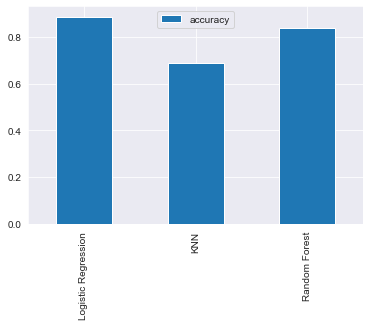

In [76]:
model_compare= pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()